In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train.csv')
train.head(10)

,filename,emotion
0,18777.mp3,neutral
1,24041.mp3,neutral
2,1621.mp3,joy
3,28883.mp3,neutral
4,14918.mp3,neutral
5,25793.mp3,neutral
6,8382.mp3,joy
7,50666.wav,disgust
8,28471.mp3,surprise
9,1459.mp3,neutral


<Axes: xlabel='count', ylabel='emotion'>

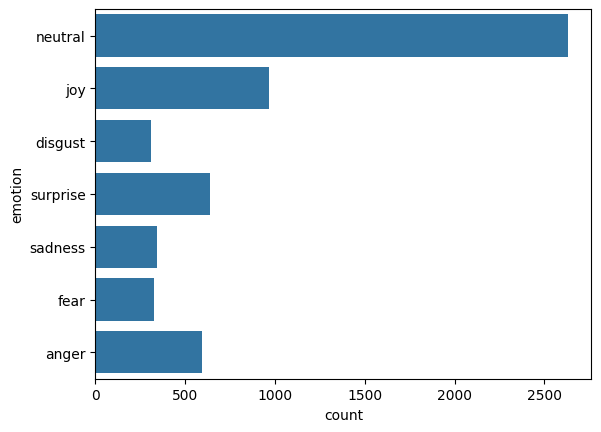

In [3]:
import seaborn as sns
sns.countplot(train['emotion'])

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
filename = 'TrainAudioFiles/0.mp3'

In [6]:
import IPython.display as ipd
import librosa
import librosa.display

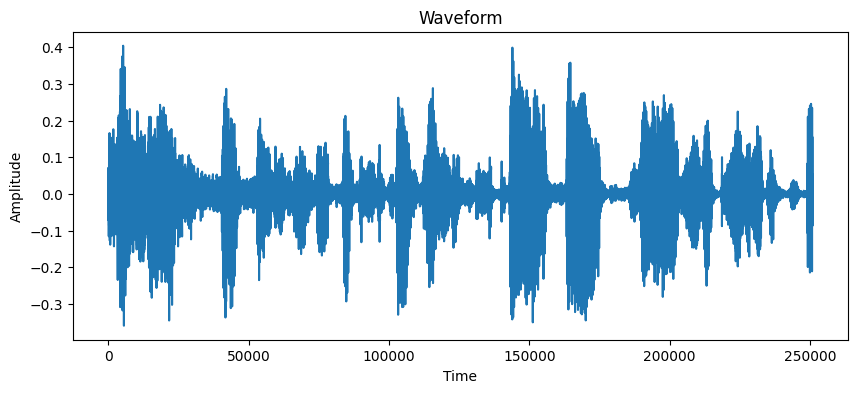

In [7]:
import librosa
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
data, sample_rate = librosa.load(filename, sr=None)
plt.plot(data)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Waveform')
plt.show()


In [8]:
sample_rate

44100

In [9]:
data

array([-0.00537607, -0.01057445, -0.0221937 , ..., -0.06350676,
       -0.06999391, -0.05410994], dtype=float32)

In [10]:
mfccs = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 491)


In [11]:
def features_extractor(file_name):
    audio, sample_rate = librosa.load(file_name) 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [12]:
audio_dataset_path = 'C:/Users/hp/OneDrive/Desktop/AudioClassification/TrainAudioFiles'
audio_dataset_path

'C:/Users/hp/OneDrive/Desktop/AudioClassification/TrainAudioFiles'

In [ ]:
import numpy as np
from tqdm import tqdm

extracted_features = []
for index_num, row in tqdm(train.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path)+ '/', str(row['filename']))
    final_class_labels = row['emotion']
    data = features_extractor(file_name)
    extracted_features.append([data, final_class_labels])

In [14]:
df = pd.DataFrame(extracted_features, columns=['feature','columns'])
df.head(10)

,feature,columns
0,"[-278.9171, 120.12856, -30.057415, 37.2134, -6...",neutral
1,"[-285.3484, 76.97822, -22.747982, 19.819517, -...",neutral
2,"[-359.36423, 116.38756, -8.774035, 65.54167, -...",joy
3,"[-230.76929, 108.19841, -38.270336, 6.7835026,...",neutral
4,"[-389.21555, 78.923485, 0.09048085, 16.737375,...",neutral
5,"[-383.94675, 107.8992, -23.529324, 31.393116, ...",neutral
6,"[-282.6143, 76.44428, -31.728697, 26.51993, -2...",joy
7,"[-430.8595, 122.25236, 19.241724, 38.32823, -3...",disgust
8,"[-378.44882, 101.75062, -17.14641, 1.6552749, ...",surprise
9,"[-259.0831, 113.40744, -7.181454, 38.591118, -...",neutral


In [18]:
df['feature'].head(5)

0    [-278.9171, 120.12856, -30.057415, 37.2134, -6...
1    [-285.3484, 76.97822, -22.747982, 19.819517, -...
2    [-359.36423, 116.38756, -8.774035, 65.54167, -...
3    [-230.76929, 108.19841, -38.270336, 6.7835026,...
4    [-389.21555, 78.923485, 0.09048085, 16.737375,...
Name: feature, dtype: object

In [15]:
X = np.array(df['feature'].to_list())
Y = np.array(df['columns'].to_list())

In [16]:
X.shape, Y.shape

((5816, 40), (5816,))

In [ ]:
Y

array(['neutral', 'neutral', 'joy', ..., 'neutral', 'surprise', 'neutral'],
      dtype='<U8')

In [18]:
import tensorflow
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(Y))

In [20]:
y

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [21]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [22]:
num_labels = y.shape[1]

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [24]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))


c:\Users\hp\OneDrive\Desktop\AudioClassification\myenv\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='RMSProp')
    

In [26]:
# from tensorflow.keras.callbacks import ModelCheckpoint
# from datetime import datetime 

# num_epochs = 100
# num_batch_size = 32

# checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.keras', 
#                                verbose=1, save_best_only=True)
# start = datetime.now()

# model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


# duration = datetime.now() - start
# print("Training completed in time: ", duration)

Epoch 1/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2331 - loss: 32.1562
Epoch 1: val_loss improved from inf to 1.90835, saving model to saved_models/audio_classification.keras
146/146 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.2332 - loss: 32.0509 - val_accuracy: 0.4330 - val_loss: 1.9083
Epoch 2/100
144/146 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2958 - loss: 2.9947
Epoch 2: val_loss improved from 1.90835 to 1.85807, saving model to saved_models/audio_classification.keras
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2968 - loss: 2.9833 - val_accuracy: 0.4399 - val_loss: 1.8581
Epoch 3/100
134/146 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4129 - loss: 1.9520
Epoch 3: val_loss improved from 1.85807 to 1.68160, saving model to saved_models/audio_classification.keras
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4145 - loss: 1.9475 - val_accuracy: 0.4399 - val_loss: 1.6816
Epoch 4/100
138/146 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0

In [27]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.49054983258247375
